The aim of this notebook is to visualize the effects of some of the transformations.

In [1]:
import sys 
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt

from types import SimpleNamespace
from monai.data import Dataset

from src.transforms import get_ssl_transforms_2d, get_ssl_transforms_3d

In [3]:
args = SimpleNamespace(**{
    'a_min': -500, 'a_max': 500, 
    'size_x': 1.0, 'size_y': 1.0, 'size_z': 2.5,
    'min_iou': 0.7, 'max_iou': 1
})

### 2D

In [4]:
transforms = get_ssl_transforms_2d(args, debug=True)

The following transforms pipeline will be used: [<monai.transforms.io.dictionary.LoadImaged object at 0x7f8fb00c9c30>, <monai.transforms.intensity.dictionary.ScaleIntensityRanged object at 0x7f8f47f5d390>, <monai.transforms.utility.dictionary.EnsureChannelFirstd object at 0x7f8f47f5d1b0>, <monai.transforms.utility.dictionary.EnsureTyped object at 0x7f8f47f5cf70>, <src.transforms.IoUCropd object at 0x7f8fb00c99f0>, <monai.transforms.utility.dictionary.EnsureTyped object at 0x7f8f47f32920>, <monai.transforms.spatial.dictionary.RandZoomd object at 0x7f8f47f5cca0>, <monai.transforms.spatial.dictionary.RandFlipd object at 0x7f8f47f5caf0>, <monai.transforms.spatial.dictionary.RandFlipd object at 0x7f8f47f5ca00>, <monai.transforms.spatial.dictionary.RandRotate90d object at 0x7f8f47f5d3f0>, <monai.transforms.intensity.dictionary.RandScaleIntensityd object at 0x7f8f47f5cee0>, <monai.transforms.intensity.dictionary.RandShiftIntensityd object at 0x7f8f47f5ce50>, <monai.transforms.intensity.dictio

/home/ditto/envs/sslct/lib/python3.10/site-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)


In [5]:
data = [
    {
        'img': '../data/ssl_preprocessed_2d/FLARETs_0040_0000_31.png'
    },
    {
        'img': '../data/ssl_preprocessed_2d/FLARETs_0041_0000_66.png'
    },
    {
        'img': '../data/ssl_preprocessed_2d/FLARETs_0043_0000_101.png'
    }
]

In [6]:
ds = Dataset(data=data, transform=transforms)

In [7]:
data = ds[2]

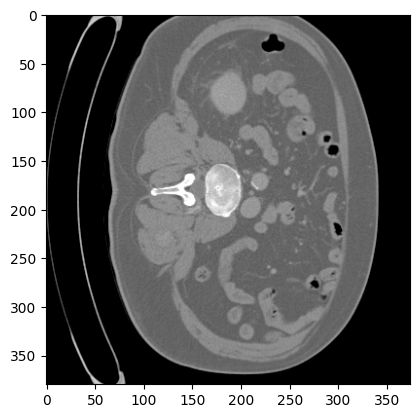

In [8]:
plt.imshow(data['img'][0], cmap='gray', vmin=0, vmax=1)
plt.show()

[slice(188, 284, None), slice(195, 291, None)]


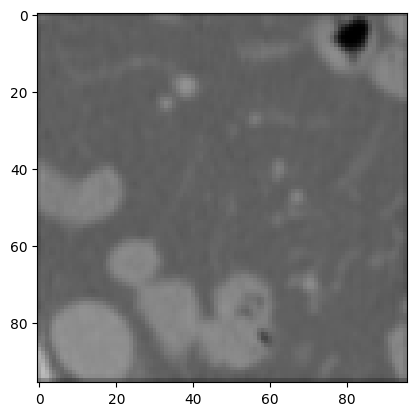

In [9]:
print(data['img1_slices'])
plt.imshow(data['img1'][0], cmap='gray', vmin=0, vmax=1)
plt.show()

[slice(184, 280, None), slice(208, 304, None)]


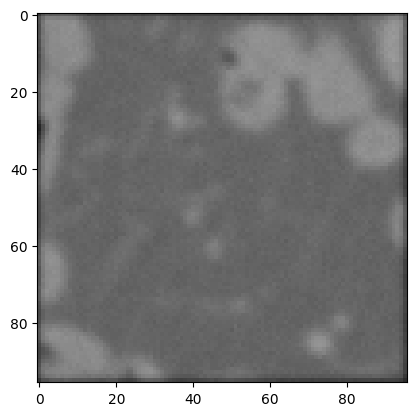

In [10]:
print(data['img2_slices'])
plt.imshow(data['img2'][0], cmap='gray', vmin=0, vmax=1)
plt.show()

### 3D

In [11]:
transforms = get_ssl_transforms_3d(args, debug=True)

The following transforms pipeline will be used: [<monai.transforms.io.dictionary.LoadImaged object at 0x7f8f4566e800>, <monai.transforms.utility.dictionary.EnsureChannelFirstd object at 0x7f8f45556d70>, <monai.transforms.utility.dictionary.EnsureTyped object at 0x7f8f45556fb0>, <src.transforms.IoUCropd object at 0x7f8f455571f0>, <monai.transforms.utility.dictionary.EnsureTyped object at 0x7f8f45556b90>, <monai.transforms.spatial.dictionary.RandZoomd object at 0x7f8f455572b0>, <monai.transforms.spatial.dictionary.RandFlipd object at 0x7f8f45557a00>, <monai.transforms.spatial.dictionary.RandFlipd object at 0x7f8f45557100>, <monai.transforms.spatial.dictionary.RandFlipd object at 0x7f8f45556c80>, <monai.transforms.spatial.dictionary.RandRotate90d object at 0x7f8f45557610>, <monai.transforms.intensity.dictionary.RandScaleIntensityd object at 0x7f8f455571c0>, <monai.transforms.intensity.dictionary.RandShiftIntensityd object at 0x7f8f45557400>, <monai.transforms.intensity.dictionary.RandGaus

In [12]:
data = [
    {
        'img': '../data/ssl_preprocessed_3d/FLARETs_0040_0000.nii.gz'
    },
    {
        'img': '../data/ssl_preprocessed_3d/FLARETs_0041_0000.nii.gz'
    },
    {
        'img': '../data/ssl_preprocessed_3d/FLARETs_0042_0000.nii.gz'
    }
]

In [13]:
ds = Dataset(data=data, transform=transforms)

In [14]:
data = ds[2]

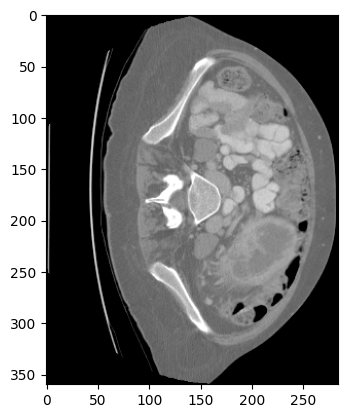

In [15]:
plt.imshow(data['img'][0][:, :, 6], cmap='gray', vmin=0, vmax=1)
plt.show()

[slice(64, 160, None), slice(106, 202, None), slice(1, 97, None)]


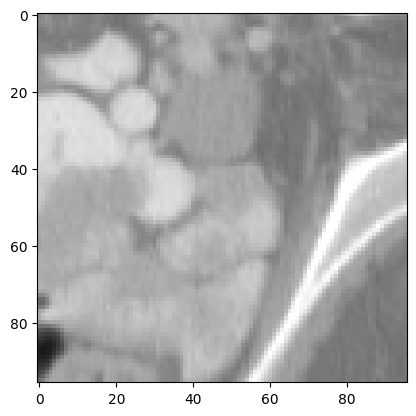

In [16]:
print(data['img1_slices'])
plt.imshow(data['img1'][0][:, :, 0], cmap='gray', vmin=0, vmax=1)
plt.show()

[slice(70, 166, None), slice(113, 209, None), slice(2, 98, None)]


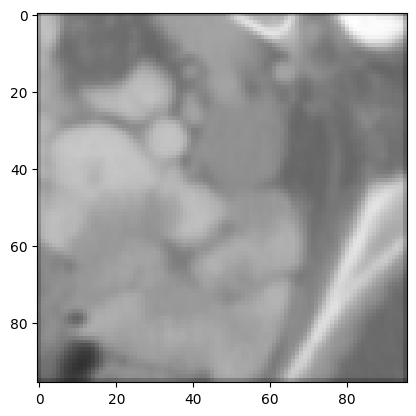

In [17]:
print(data['img2_slices'])
plt.imshow(data['img2'][0][:, :, 2], cmap='gray', vmin=0, vmax=1)
plt.show()